<h1><center> LHoutputs 
APT SCT



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/!lab/Manuscripts/LHoutputs/rawdata/

/content/drive/MyDrive/!lab/Manuscripts/LHoutputs/rawdata


In [3]:
%run /content/drive/MyDrive/!lab/FiberPhotometryDataAnalysis.ipynb

All Fiber Photometry functions are ready to use


In [4]:
mice = ['LHA1','LHA2','LHA3','LHA4','LHA5','LHA6','LHA7','LHA8','LHA9','LHA10','LHA11','LHA12',
        'LHA13','LHA14','LHA15','LHA16','LHA17',
        'LHA73','LHA74','LHA75','LHA76','LHA77','LHA78','LHA79','LHA80','LHA81','LHA82',
        'LHA83','LHA84','LHA86']
outputs = ['LHA-LHb', 'LHA-VTA','LHA-DRN']        
tests = ['APT','SCT']

In [5]:
filename = 'LH_apt-sct.h5'

# Save recordings to HDF file

In [8]:
folders = {'APT': ['/content/drive/My Drive/!lab/Data/Kate/!FP/Wrap-up of LHA/AP/raw/',
                   '/content/drive/MyDrive/!lab/Data/Kate/!FP/2019-06-03-07 LHA-6s Airpuff Hands on/raw/',
                   '/content/drive/MyDrive/!lab/Data/Kate/!FP/2019-06-17 LHA-7s-eYFP Airpuff/raw/',
                   '/content/drive/MyDrive/!lab/Data/Kate/!FP/2019-07-09 LHA-6s-7s-eYFP Airpuff2/raw/'],
           'SCT': ['/content/drive/My Drive/!lab/Data/Kate/!FP/Wrap-up of LHA/SCT/raw/']}

### APT

In [91]:
test = 'APT'
apt_full_file_names = []
for folder in folders[test]:
  files = find_files(folder,['.xlsx'])
  for f in files:
    apt_full_file_names.append(folder+f)
#apt_full_file_names

In [92]:
for file_ in apt_full_file_names:

  file_split = file_.split('/') 
  name = file_split[-1]
  folder = '/'.join(file_split[:-1])

  # Experiment info ------------------------------------------------------------
  sepname = name.split('_')      
  mouse = sepname[0]
  experiment = sepname[-1][:-5]

  if experiment[-1] == 'f': # for LHA13,14,15,16,17
    outputs = ['LHA-LHb','LHA-VTA','LHA-DRN']
    trial = '1'
  elif experiment[-1] in ['1','2','3']: # for first 3 trials with only one connection
    outputs = ['LHA-'+sepname[1]]
    trial = experiment[-1]
  else:
    outputs = ['LHA-'+sepname[1],'LHA-'+sepname[2],'LHA-'+sepname[3]]
    trial = experiment[-1]

 # Read data
  df = pd.read_excel(file_,index_col=False)
  df = df[1:]

 # Time
  realtime_fp = [str(t) for t in df['Datetime_410nm']]
  time_ = time_to_seconds(realtime_fp, realtime_fp[0])
  
 # Signals
  references = {}
  signals = {}
  for fiber,output in enumerate(outputs):
    if output in ['LHA-1','LHA-2','LHA-3']:
      pass
    else:
      references[output] = np.array(df['MeanInt_410nm_'+str(fiber*2+1)])
      try:
        signals[output] = np.array(df['MeanInt_470nm_'+str(fiber*2+1)])
      except:
        signals[output] = np.array(df['MeanInt_470560nm_'+str(fiber*2+1)])

  for fiber,output in enumerate(outputs):
    if output in ['LHA-1','LHA-2','LHA-3']:
      outputs.pop(fiber)


 # Events
  v = np.array(df['Event_410nm'])
  dv = np.diff(v)
  airpuff = [time_[i] for i in range(len(dv)) if dv[i-1]>0]
  airpuff = np.array(airpuff).reshape(len(airpuff),1)
  airpuff = airpuff - 0.3

  events = {'airpuff': airpuff}

    
  raw = FiberPhotometryRecording(signals,references,time_,events,mouse=mouse,test='APT',trial=trial)
  raw.saveRecording(filename)
  print(raw.mouse, raw.test, raw.trial, raw.outputs)

LHA1 APT 2 ['LHA-VTA']
LHA1 APT 3 ['LHA-DRN']
LHA1 APT 7 ['LHA-VTA', 'LHA-DRN']
LHA1 APT 6 ['LHA-LHb', 'LHA-DRN']
LHA1 APT 5 ['LHA-VTA', 'LHA-DRN']
LHA1 APT 1 ['LHA-LHb']
LHA1 APT 4 ['LHA-DRN', 'LHA-LHb']
LHA2 APT 3 ['LHA-DRN']
LHA2 APT 1 ['LHA-LHb']
LHA2 APT 2 ['LHA-VTA']
LHA2 APT 4 ['LHA-DRN', 'LHA-LHb']
LHA3 APT 4 ['LHA-DRN', 'LHA-VTA']
LHA3 APT 3 ['LHA-DRN']
LHA3 APT 1 ['LHA-LHb']
LHA3 APT 2 ['LHA-VTA']
LHA6 APT 5 ['LHA-VTA', 'LHA-DRN']
LHA3 APT 7 ['LHA-VTA', 'LHA-DRN']
LHA3 APT 6 ['LHA-LHb', 'LHA-DRN']
LHA4 APT 2 ['LHA-VTA']
LHA4 APT 7 ['LHA-VTA', 'LHA-DRN']
LHA4 APT 6 ['LHA-LHb', 'LHA-DRN']
LHA4 APT 4 ['LHA-DRN', 'LHA-LHb']
LHA4 APT 5 ['LHA-VTA', 'LHA-DRN']
LHA5 APT 1 ['LHA-LHb']
LHA4 APT 1 ['LHA-LHb']
LHA5 APT 2 ['LHA-VTA']
LHA6 APT 1 ['LHA-LHb']
LHA6 APT 2 ['LHA-VTA']
LHA8 APT 3 ['LHA-DRN']
LHA5 APT 3 ['LHA-DRN']
LHA6 APT 4 ['LHA-DRN', 'LHA-LHb']
LHA4 APT 3 ['LHA-DRN']
LHA8 APT 1 ['LHA-LHb']
LHA6 APT 6 ['LHA-LHb', 'LHA-DRN']
LHA6 APT 7 ['LHA-VTA', 'LHA-DRN']
LHA8 APT 2 ['LHA-VT

### APT w/movement

In [93]:
test = 'APT'
apt_full_file_names = []
for folder in folders[test]:
  files = find_files(folder,['green','csv'])
  for f in files:
    mouse = f.split('_')[0]
    if mouse in mice:
      apt_full_file_names.append(folder+f) 
#apt_full_file_names

In [94]:
for file_ in apt_full_file_names:

  file_split = file_.split('/') 
  name = file_split[-1]
  folder = '/'.join(file_split[:-1])

  # Experiment info ------------------------------------------------------------
  sepname = name.split('_')      
  mouse = sepname[0]
  experiment = sepname[4]
  if experiment[-1] == 'f':
    trial = '1'
  else:
    trial = experiment[-1]
 

 # FP file
  df = pd.read_csv(file_,sep=' ',index_col=False)
 # Adjust file length
  if len(df) % 2 != 0:
    df.drop(df.index[-1],inplace=True)

 # Signal ----------------------------------------------------------------------
  references = {}
  signals = {}
  for fiber,output in enumerate(outputs):
    if output in ['LHA-1','LHA-2','LHA-3']:
      pass
    else:
      references[output] = np.array(df.iloc[1::2,fiber])
      signals[output] = np.array(df.iloc[ ::2,fiber])

  for fiber,output in enumerate(outputs):
    if output in ['LHA-1','LHA-2','LHA-3']:
      outputs.pop(fiber)


 # Time vector
  realtime_fp = create_realtime(10,mm=list(df['Item4']),ss=list(df['Item5']),ms=list(df['Item6']))
  time_fp = time_to_seconds(realtime_fp, realtime_fp[0])
  time_ = time_fp[::2]

  # Behavioral events ----------------------------------------------------------
  key_name = find_files(folder,[name[:-28],'keypress'])[0]
  df_key = pd.read_csv(folder+'/'+key_name,sep=' ',index_col=False,header=None)
  realtime_ap = create_realtime(10,mm=list(df_key.iloc[:,1]),ss=list(df_key.iloc[:,2]),ms=list(df_key.iloc[:,3]))
  airpuff = time_to_seconds(realtime_ap,realtime_fp[0])
  for i,a in enumerate(airpuff):
    if a < 0:
      airpuff[i] = 3600 + a

  airpuff = airpuff - 0.3

  events = {'airpuff': np.array(airpuff).reshape(len(airpuff),1)}

 # DeepLabCut results
  folder_dlc = '/content/drive/MyDrive/!lab/Data/Kate/DeepLabCut/LHairpuff-Kate-2021-06-14/videos/'
  file_dlc = find_files(folder_dlc, [name[:-28],'LHairpuffJun14shuffle1_30500'])[0]
  df_dlc = pd.read_hdf(folder_dlc+'/'+file_dlc, 'df_with_missing')
  x_body = np.array(df_dlc[('DLC_resnet50_LHairpuffJun14shuffle1_30500', 'body', 'x')])
  y_body = np.array(df_dlc[('DLC_resnet50_LHairpuffJun14shuffle1_30500', 'body', 'y')])

 # Video time
  file_pose = find_files(folder,[name[:-28],'position'])[0]
  df_pose = pd.read_csv(folder+'/'+file_pose,sep=' ',index_col=False,header=None)
  realtime_pose = create_realtime(10,mm=list(df_pose.iloc[:,2]),ss=list(df_pose.iloc[:,3]),ms=list(df_pose.iloc[:,4]))
  time_pose = time_to_seconds(realtime_pose,realtime_fp[0])
  l = min(x_body.size,time_pose.size)
  x_body = x_body[:l]; y_body = y_body[:l]
  time_pose = time_pose[:l]
  speed_body = get_speed(x_body,y_body,time_pose)
  speed_body,time_body = remove_outliers(speed_body,time_pose)
  movement_body = np.interp(speed_body, (np.nanmin(speed_body),np.nanmax(speed_body)), (0,1))

 # Measurements
  measurements = {'movement': {'values': movement_body,
                                 'time': time_body}}


  raw = FiberPhotometryRecording(signals,references,time_,events,measurements,mouse=mouse,test='APTmovement',trial=trial)
  raw.saveRecording(filename)
  print(raw.mouse,raw.test,raw.trial,airpuff.T)

LHA80 APTmovement 1 [ 50.465 179.854 240.704 299.29  308.858 433.695]
LHA81 APTmovement 1 [ 54.887 122.689 184.443 245.862 298.92 ]
LHA73 APTmovement 1 [ 59.414 119.128 183.155 245.205 296.023]
LHA74 APTmovement 1 [ 60.81  121.605 180.015 240.425 302.387]
LHA77 APTmovement 1 [ 63.249 121.188 180.451 236.186 292.705 355.521]
LHA82 APTmovement 1 [ 50.294 108.173 167.244 228.428 295.324]
LHA75 APTmovement 1 [ 70.317 128.727 192.649 243.859 302.509]
LHA76 APTmovement 1 [ 62.475 126.621 190.375 252.258 321.676]
LHA78 APTmovement 1 [ 45.398 104.688 164.786 231.668 282.942]
LHA79 APTmovement 1 [ 58.361 114.907 174.677 232.167 291.562]
LHA84 APTmovement 1 [ 56.579 118.05  179.162 237.881 297.672]
LHA83 APTmovement 1 [ 58.932 117.995 180.307 240.954 296.601]
LHA86 APTmovement 1 [ 58.833 120.448 180.032 238.303 300.182]
LHA73 APTmovement 2 [ 50.278 109.295 169.384 228.504 287.833]
LHA74 APTmovement 2 [ 61.248 122.176 181.377 243.578 304.115]
LHA75 APTmovement 2 [ 55.996 115.429 177.382 234.43  2

### SCT

In [95]:
test = 'SCT'
sct_full_file_names = []
for folder in folders[test]:
  files = find_files(folder,['.xlsx'])
  for f in files:
    sct_full_file_names.append(folder+f)
#sct_full_file_names

In [96]:
for file_ in sct_full_file_names:

  file_split = file_.split('/') 
  name = file_split[-1]
  folder = '/'.join(file_split[:-1])

  # Experiment info ------------------------------------------------------------
  sepname = name.split('_')      
  mouse = sepname[0]
  experiment = sepname[-1][:-5]
  outputs = ['LHA-'+sepname[1],'LHA-'+sepname[2],'LHA-'+sepname[3]]

  if experiment[-1] == 'e':
    trial = '1'
  else:
    n_trial = int(experiment[-1])
    if n_trial > 2:
      trial = str(n_trial-1)
    else:
      trial = str(n_trial)

 # Read data
  df = pd.read_excel(file_,index_col=False)
  df = df[1:]

 # Time
  realtime_fp = [str(t) for t in df['Datetime_410nm']]
  time_ = time_to_seconds(realtime_fp, realtime_fp[0])
  
 # Signals
  references = {}
  signals = {}
  for fiber,output in enumerate(outputs):
    if output in ['LHA-1','LHA-2','LHA-3']:
      pass
    else:
      references[output] = np.array(df['MeanInt_410nm_'+str(fiber*2+1)])
      signals[output] = np.array(df['MeanInt_470nm_'+str(fiber*2+1)])

  for fiber,output in enumerate(outputs):
    if output in ['LHA-1','LHA-2','LHA-3']:
      outputs.pop(fiber)


 # Behavioral events -----------------------------------------------------------

 # Sucrose licking measured manually
  licks = np.array(df['Event_410nm'])
  licks[licks==1] = 0
  licks[licks>1] = 1
  consumption = event_onoffset(licks,time_)
  if len(consumption) != 0:
    consumption = adjust_intervals_durations(consumption,1,1)
  if consumption.shape == (2,):
    consumption = consumption.reshape(1,2)

  consumption = consumption-0.3

  events = {'consumption': consumption}

  measurements = {'licks': {'time': time_,
                          'values': licks}}
  
  raw = FiberPhotometryRecording(signals,references,time_,events,measurements,mouse,'SCT',trial)
  raw.saveRecording(filename)
  print(raw.mouse,raw.test,raw.trial,raw.outputs)

LHA10 SCT 3 ['LHA-DRN', 'LHA-VTA']
LHA10 SCT 1 ['LHA-DRN', 'LHA-LHb']
LHA10 SCT 2 ['LHA-DRN', 'LHA-VTA']
LHA11 SCT 1 ['LHA-DRN', 'LHA-LHb']
LHA11 SCT 2 ['LHA-DRN', 'LHA-VTA']
LHA12 SCT 3 ['LHA-DRN', 'LHA-LHb']
LHA12 SCT 1 ['LHA-DRN', 'LHA-LHb']
LHA12 SCT 2 ['LHA-DRN', 'LHA-VTA']
LHA13 SCT 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA14 SCT 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA15 SCT 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA16 SCT 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA17 SCT 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA1 SCT 3 ['LHA-DRN', 'LHA-LHb']
LHA1 SCT 4 ['LHA-DRN', 'LHA-VTA']
LHA1 SCT 1 ['LHA-DRN', 'LHA-LHb']
LHA1 SCT 2 ['LHA-DRN', 'LHA-VTA']
LHA2 SCT 3 ['LHA-DRN', 'LHA-LHb']
LHA2 SCT 1 ['LHA-DRN', 'LHA-LHb']
LHA2 SCT 2 ['LHA-DRN', 'LHA-VTA']
LHA3 SCT 3 ['LHA-DRN', 'LHA-VTA']
LHA3 SCT 2 ['LHA-DRN', 'LHA-VTA']
LHA3 SCT 1 ['LHA-LHb', 'LHA-DRN']
LHA4 SCT 3 ['LHA-DRN', 'LHA-LHb']
LHA4 SCT 4 ['LHA-DRN', 'LHA-VTA']
LHA4 SCT 1 ['LHA-DRN', 'LHA-LHb']
LHA4 SCT 2 ['LHA-DRN', 'LHA-VTA']
LHA5 SCT 1 ['L

### SCT w/movement

In [97]:
test = 'SCT'
sct_full_file_names = [] 
for folder in folders[test]:
  files = find_files(folder,['.xlsx'])
  for f in files:
    sct_full_file_names.append(folder+f)
# sct_full_file_names

In [98]:
for file_ in sct_full_file_names:

  file_split = file_.split('/') 
  name = file_split[-1]
  folder = '/'.join(file_split[:-1])

  # Experiment info ------------------------------------------------------------
  sepname = name.split('_')      
  mouse = sepname[0]
  experiment = sepname[-1][:-5]
  outputs = ['LHA-'+sepname[1],'LHA-'+sepname[2],'LHA-'+sepname[3]]

  try: file_am = find_files(folder,[mouse,experiment,'Anymaze'])[0]
  except: print('passed '+mouse+' '+experiment); continue

  if experiment[-1] == 'e':
    continue
  else:
    n_trial = int(experiment[-1])
    if n_trial > 2:
      trial = str(n_trial-1)
    else:
      trial = str(n_trial)

 # Read data
  df = pd.read_excel(file_,index_col=False)
  df = df[1:]

 # Time
  realtime_fp = [str(t) for t in df['Datetime_410nm']]
  time_ = time_to_seconds(realtime_fp, realtime_fp[0])
  
 # Signals
  references = {}
  signals = {}
  for fiber,output in enumerate(outputs):
    if output in ['LHA-1','LHA-2','LHA-3']:
      pass
    else:
      references[output] = np.array(df['MeanInt_410nm_'+str(fiber*2+1)])
      signals[output] = np.array(df['MeanInt_470nm_'+str(fiber*2+1)])

  for fiber,output in enumerate(outputs):
    if output in ['LHA-1','LHA-2','LHA-3']:
      outputs.pop(fiber)


 # Behavioral events -----------------------------------------------------------

 # Sucrose licking measured manually
  licks = np.array(df['Event_410nm'])
  licks[licks==1] = 0; licks[licks>1] = 1
  consumption = event_onoffset(licks,time_)
  if len(consumption) != 0:
    consumption = adjust_intervals_durations(consumption,1,1)
  if consumption.shape == (2,):
    consumption = consumption.reshape(1,2)
 # Adjust consumption onset due human reaction delay
  consumption = consumption-0.3

  events = {'consumption': consumption}

 # DeepLabCut results
  folder_dlc = '/content/drive/MyDrive/!lab/Data/Kate/DeepLabCut/LHsucrose-Kate-2021-06-15/videos/'
  file_dlc = find_files(folder_dlc, [mouse,experiment,'DLC_resnet50_LHsucroseJun15shuffle1_173000'])[0]
  df_dlc = pd.read_hdf(folder_dlc+'/'+file_dlc, 'df_with_missing')
  x_body = np.array(df_dlc[('DLC_resnet50_LHsucroseJun15shuffle1_173000', 'body', 'x')])
  y_body = np.array(df_dlc[('DLC_resnet50_LHsucroseJun15shuffle1_173000', 'body', 'y')])

 # Video time
  import imageio
  reader = imageio.get_reader(folder_dlc+mouse+'_'+experiment+'_adj.mp4')
  fps = reader.get_meta_data()['fps']
  time_pose = np.arange(0,len(x_body)/fps,1/fps)
  time_pose = time_pose[:len(x_body)]
  speed_body = get_speed(x_body,y_body,time_pose)
  speed_body,time_body = remove_outliers(speed_body,time_pose)
  movement_body = np.interp(speed_body, (np.nanmin(speed_body),np.nanmax(speed_body)), (0,1))

 # Measurements
  measurements = {'movement': {'values': movement_body,
                                 'time': time_body}}

  
  raw = FiberPhotometryRecording(signals,references,time_,events,measurements,mouse,'SCTmovement',trial)
  raw.saveRecording(filename)
  print(raw.mouse,raw.test,raw.trial,name,file_dlc)

LHA10 SCTmovement 3 LHA10_1_DRN_VTA_sucrose4.xlsx LHA10_sucrose4_adjDLC_resnet50_LHsucroseJun15shuffle1_173000.h5
passed LHA10 sucrose2
passed LHA11 sucrose
passed LHA11 sucrose2
LHA12 SCTmovement 3 LHA12_1_DRN_LHb_sucrose4.xlsx LHA12_sucrose4_adjDLC_resnet50_LHsucroseJun15shuffle1_173000.h5
passed LHA12 sucrose2
passed LHA13 sucrose
passed LHA14 sucrose
passed LHA15 sucrose
passed LHA16 sucrose
passed LHA17 sucrose
LHA1 SCTmovement 3 LHA1_1_DRN_LHb_sucrose4.xlsx LHA1_sucrose4_adjDLC_resnet50_LHsucroseJun15shuffle1_173000.h5
LHA1 SCTmovement 4 LHA1_1_DRN_VTA_sucrose5.xlsx LHA1_sucrose5_adjDLC_resnet50_LHsucroseJun15shuffle1_173000.h5
passed LHA1 sucrose2
LHA2 SCTmovement 3 LHA2_1_DRN_LHb_sucrose4.xlsx LHA2_sucrose4_adjDLC_resnet50_LHsucroseJun15shuffle1_173000.h5
passed LHA2 sucrose2
LHA3 SCTmovement 3 LHA3_1_DRN_VTA_sucrose4.xlsx LHA3_sucrose4_adjDLC_resnet50_LHsucroseJun15shuffle1_173000.h5
passed LHA3 sucrose2
LHA4 SCTmovement 3 LHA4_1_DRN_LHb_sucrose4.xlsx LHA4_sucrose4_adjDLC_resn

# Processing data

In [99]:
info_for_array = {'airpuff': {'avg_frame': [-2.0,-1.0]},
              'consumption': { 'duration': 2.0,
                              'interaval': 2.0,
                              'avg_frame': [-2.0,-1.0]}}

In [ ]:
for test in ['APT']:
  for mouse in mice:
    for trial in ['1','2','3','4','5','6','7']:

        r = FiberPhotometryRecording()
        r.loadRecording(filename,mouse,test,trial)
        if r.rawSignals is not None:
          r.getDFF(airpls_lambda=5e3,smooth_parameter=1)
          r.getPerievents(info_for_array)
          r.saveRecording(filename)
        del r

In [ ]:
for test in ['SCT']:
  for mouse in mice:
    for trial in ['1','2','3','4']:

        r = FiberPhotometryRecording()
        r.loadRecording(filename,mouse,test,trial)
        if r.rawSignals is not None:
          r.getDFF(airpls_lambda=5e3,smooth_parameter=1)
          r.getPerievents(info_for_array)
          r.saveRecording(filename)
        del r

In [ ]:
for test in ['APTmovement']:
  for mouse in mice:
    for trial in ['1','2']:

      r = FiberPhotometryRecording()
      r.loadRecording(filename,mouse,test,trial)
      if r.rawSignals is not None:
        if r.measurements is not None:
          r.smoothMeasurements(smooth_filter='moving average',smooth_parameter=0.5)
          r.interpolateMeasurements(period=0.1)
        r.getDFF(airpls_lambda=5e3,smooth_parameter=1,interpolate=True,period=0.1)#,plot=True,save=True)
        r.getPerievents(info_for_array)#,plot=True,save=True)
        r.saveRecording(filename) 
      del r

In [ ]:
for test in ['SCTmovement']:
  for mouse in mice:
    for trial in ['3','4']:
        r = FiberPhotometryRecording()
        r.loadRecording(filename,mouse,test,trial)
        if r.rawSignals is not None:
          if r.measurements is not None:
            r.smoothMeasurements(smooth_filter='moving average',smooth_parameter=1)
            r.interpolateMeasurements(period=0.1)
            r.getDFF(airpls_lambda=5e4,smooth_parameter=1)#,plot=True,save=True)
          r.getPerievents(info_for_array)#,plot=True,save=True)
          r.saveRecording(filename)
        del r

# Example traces

In [38]:
r = FiberPhotometryRecording()
r.loadRecording(filename,'LHA15','APT','1')
r.getDFF(airpls_lambda=5e3,smooth_parameter=0.5)

The recording for mouse LHA15 in the experiment APT-1 is successfully loaded.


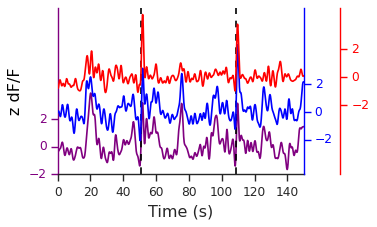

In [39]:
r.plotExample(['LHA-DRN','LHA-VTA','LHA-LHb'],event='airpuff',
              t0=130,t1=280,
              ylim=[-2,10],ylim1=[-4.5,7.5],ylim2=[-7,5],
              yticks=[-2,0,2],yticks1=[-2,0,2],yticks2=[-2,0,2],
              figsize=(5,3))
plt.show()

In [36]:
r = FiberPhotometryRecording()
r.loadRecording(filename,'LHA16','SCT','1')
r.getDFF(airpls_lambda=5e3,smooth_parameter=0.5)

The recording for mouse LHA16 in the experiment SCT-1 is successfully loaded.


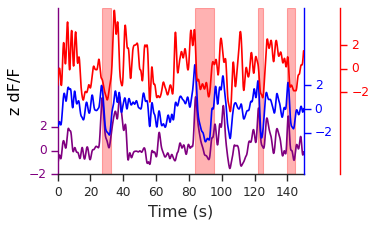

In [37]:
r.plotExample(['LHA-DRN','LHA-VTA','LHA-LHb'],'consumption',
              t0=35,t1=185,
              ylim=[-2,12],ylim1=[-5.5,8.5],ylim2=[-9,5.2], 
              yticks=[-2,0,2],yticks1=[-2,0,2],yticks2=[-2,0,2],
              figsize=(5,3))
plt.show()

# Summary plots

#### Set attributes to the HDF file

In [27]:
with h5py.File(filename,'a') as f:
  f.attrs['mice'] = mice
  f.attrs['outputs'] = outputs
  f.attrs['tests'] = tests

In [28]:
with h5py.File(filename, 'a') as f:
  f.attrs['good recordings'] = [['LHA1','APT','4','LHA-LHb'],
                                ['LHA1','APT','6','LHA-LHb'],
                                ['LHA1','APT','2','LHA-VTA'],
                                ['LHA1','APT','5','LHA-VTA'],
                                ['LHA1','APT','7','LHA-VTA'],
                                ['LHA1','APT','4','LHA-DRN'],
                                ['LHA2','APT','1','LHA-LHb'],
                                ['LHA2','APT','4','LHA-LHb'],
                                ['LHA2','APT','3','LHA-DRN'],
                                ['LHA3','APT','6','LHA-LHb'],
                                ['LHA3','APT','2','LHA-VTA'],
                                ['LHA3','APT','7','LHA-VTA'],
                                ['LHA3','APT','3','LHA-DRN'],
                                ['LHA3','APT','6','LHA-DRN'],
                                ['LHA4','APT','1','LHA-LHb'],
                                ['LHA4','APT','4','LHA-LHb'],
                                ['LHA4','APT','6','LHA-LHb'],
                                ['LHA4','APT','2','LHA-VTA'],
                                ['LHA4','APT','5','LHA-VTA'],
                                ['LHA4','APT','7','LHA-VTA'],
                                ['LHA4','APT','4','LHA-DRN'],
                                ['LHA4','APT','5','LHA-DRN'],
                                ['LHA4','APT','6','LHA-DRN'],
                                ['LHA6','APT','1','LHA-LHb'],
                                ['LHA6','APT','4','LHA-LHb'],
                                ['LHA6','APT','6','LHA-LHb'],
                                ['LHA6','APT','5','LHA-VTA'],
                                ['LHA6','APT','4','LHA-DRN'],
                                ['LHA6','APT','5','LHA-DRN'],
                                ['LHA6','APT','6','LHA-DRN'],
                                ['LHA9','APT','4','LHA-VTA'],
                                ['LHA9','APT','7','LHA-VTA'],
                                ['LHA9','APT','4','LHA-DRN'],
                                ['LHA9','APT','6','LHA-DRN'],
                                ['LHA10','APT','2','LHA-VTA'],
                                ['LHA10','APT','4','LHA-VTA'],
                                ['LHA10','APT','7','LHA-VTA'],
                                ['LHA10','APT','3','LHA-DRN'],
                                ['LHA10','APT','4','LHA-DRN'],
                                ['LHA10','APT','6','LHA-DRN'],
                                ['LHA12','APT','1','LHA-LHb'],
                                ['LHA12','APT','4','LHA-LHb'],
                                ['LHA12','APT','6','LHA-LHb'],
                                ['LHA12','APT','6','LHA-DRN'],
                                ['LHA12','APT','7','LHA-DRN'],
                                ['LHA13','APT','1','LHA-LHb'],
                                ['LHA13','APT','1','LHA-VTA'],
                                ['LHA13','APT','1','LHA-DRN'],
                                ['LHA14','APT','1','LHA-VTA'],
                                ['LHA14','APT','1','LHA-DRN'],
                                ['LHA15','APT','1','LHA-LHb'],
                                ['LHA15','APT','1','LHA-VTA'],
                                ['LHA15','APT','1','LHA-DRN'],
                                ['LHA16','APT','1','LHA-LHb'],
                                ['LHA16','APT','1','LHA-VTA'],
                                ['LHA16','APT','1','LHA-DRN'],
                                ['LHA17','APT','1','LHA-LHb'],
                                ['LHA17','APT','1','LHA-VTA'],
                                ['LHA73','APTmovement','1','LHA-LHb'],
                                ['LHA74','APTmovement','1','LHA-LHb'],#?
                                ['LHA74','APTmovement','1','LHA-VTA'],
                                ['LHA74','APTmovement','2','LHA-LHb'],
                                ['LHA74','APTmovement','2','LHA-VTA'],
                                ['LHA75','APTmovement','1','LHA-DRN'],#?
                                ['LHA76','APTmovement','1','LHA-LHb'],
                                ['LHA76','APTmovement','1','LHA-VTA'],
                                ['LHA76','APTmovement','1','LHA-DRN'],#?
                                ['LHA77','APTmovement','1','LHA-LHb'],
                                ['LHA77','APTmovement','1','LHA-VTA'],
                                ['LHA77','APTmovement','1','LHA-DRN'],
                                ['LHA77','APTmovement','2','LHA-DRN'],#?
                                ['LHA78','APTmovement','1','LHA-LHb'],
                                ['LHA78','APTmovement','1','LHA-VTA'],
                                ['LHA78','APTmovement','1','LHA-DRN'],
                                ['LHA78','APTmovement','2','LHA-LHb'],#?
                                ['LHA78','APTmovement','2','LHA-VTA'],
                                ['LHA78','APTmovement','2','LHA-DRN'],
                                ['LHA79','APTmovement','1','LHA-LHb'],
                                ['LHA79','APTmovement','1','LHA-VTA'],
                                ['LHA79','APTmovement','2','LHA-VTA'],
                                ['LHA80','APTmovement','1','LHA-DRN'],#?
                                ['LHA80','APTmovement','2','LHA-LHb'],
                                ['LHA80','APTmovement','2','LHA-VTA'],#?
                                ['LHA80','APTmovement','2','LHA-DRN'],#?
                                ['LHA81','APTmovement','1','LHA-LHb'],
                                ['LHA81','APTmovement','1','LHA-VTA'],
                                ['LHA81','APTmovement','1','LHA-DRN'],
                                ['LHA81','APTmovement','2','LHA-DRN'],
                                ['LHA82','APTmovement','1','LHA-LHb'],
                                ['LHA82','APTmovement','1','LHA-VTA'],
                                ['LHA82','APTmovement','1','LHA-DRN'],
                                ['LHA82','APTmovement','2','LHA-LHb'],
                                ['LHA82','APTmovement','2','LHA-DRN'],
                                ['LHA83','APTmovement','1','LHA-LHb'],
                                ['LHA83','APTmovement','1','LHA-VTA'],
                                ['LHA83','APTmovement','1','LHA-DRN'],#?
                                ['LHA83','APTmovement','2','LHA-DRN'],
                                ['LHA84','APTmovement','1','LHA-LHb'],
                                ['LHA84','APTmovement','1','LHA-VTA'],
                                ['LHA84','APTmovement','1','LHA-DRN'],#?
                                ['LHA84','APTmovement','2','LHA-LHb'],
                                ['LHA84','APTmovement','2','LHA-VTA'],
                                ['LHA84','APTmovement','2','LHA-DRN'],#?
                                ['LHA86','APTmovement','1','LHA-LHb'],
                                ['LHA86','APTmovement','1','LHA-VTA'],
                                ['LHA86','APTmovement','1','LHA-DRN'],
                                ['LHA86','APTmovement','2','LHA-LHb'],
                                ['LHA86','APTmovement','2','LHA-VTA'],
                                ['LHA86','APTmovement','2','LHA-DRN'],
                                ['LHA1','SCT','1','LHA-LHb'],
                                ['LHA1','SCT','3','LHA-LHb'],
                                ['LHA1','SCT','4','LHA-VTA'],
                                ['LHA1','SCT','1','LHA-DRN'],
                                ['LHA1','SCT','3','LHA-DRN'],
                                ['LHA1','SCT','4','LHA-DRN'],
                                ['LHA2','SCT','1','LHA-LHb'],
                                ['LHA2','SCT','3','LHA-LHb'],
                                ['LHA2','SCT','2','LHA-VTA'],
                                ['LHA2','SCT','1','LHA-DRN'],
                                ['LHA2','SCT','3','LHA-DRN'],
                                ['LHA3','SCT','1','LHA-LHb'],
                                ['LHA3','SCT','2','LHA-VTA'],
                                ['LHA3','SCT','3','LHA-VTA'],
                                ['LHA3','SCT','2','LHA-DRN'],
                                ['LHA3','SCT','3','LHA-DRN'],
                                ['LHA4','SCT','1','LHA-LHb'],
                                ['LHA4','SCT','3','LHA-LHb'],
                                ['LHA4','SCT','2','LHA-VTA'],
                                ['LHA4','SCT','4','LHA-VTA'],
                                ['LHA4','SCT','1','LHA-DRN'],
                                ['LHA4','SCT','2','LHA-DRN'],
                                ['LHA4','SCT','3','LHA-DRN'],
                                ['LHA4','SCT','4','LHA-DRN'],
                                ['LHA5','SCT','1','LHA-LHb'],
                                ['LHA5','SCT','2','LHA-VTA'],
                                ['LHA5','SCT','1','LHA-DRN'],
                                ['LHA6','SCT','1','LHA-LHb'],
                                ['LHA6','SCT','2','LHA-VTA'],
                                ['LHA6','SCT','4','LHA-VTA'],
                                ['LHA6','SCT','2','LHA-DRN'],
                                ['LHA6','SCT','4','LHA-DRN'],
                                ['LHA9','SCT','1','LHA-LHb'],
                                ['LHA9','SCT','2','LHA-VTA'],
                                ['LHA9','SCT','3','LHA-VTA'],
                                ['LHA9','SCT','1','LHA-DRN'],
                                ['LHA9','SCT','2','LHA-DRN'],
                                ['LHA10','SCT','2','LHA-VTA'],
                                ['LHA10','SCT','3','LHA-VTA'],
                                ['LHA10','SCT','1','LHA-DRN'],
                                ['LHA10','SCT','2','LHA-DRN'],
                                ['LHA10','SCT','3','LHA-DRN'],
                                ['LHA11','SCT','1','LHA-DRN'],
                                ['LHA12','SCT','1','LHA-LHb'],
                                ['LHA12','SCT','3','LHA-LHb'],
                                ['LHA12','SCT','3','LHA-DRN'],
                                ['LHA14','SCT','1','LHA-LHb'],
                                ['LHA14','SCT','1','LHA-VTA'],
                                ['LHA14','SCT','1','LHA-DRN'],
                                ['LHA15','SCT','1','LHA-LHb'],
                                ['LHA15','SCT','1','LHA-VTA'],
                                ['LHA15','SCT','1','LHA-DRN'],
                                ['LHA16','SCT','1','LHA-LHb'],
                                ['LHA16','SCT','1','LHA-VTA'],
                                ['LHA16','SCT','1','LHA-DRN'],
                                ['LHA17','SCT','1','LHA-LHb'],
                                ['LHA17','SCT','1','LHA-VTA'],
                                ['LHA17','SCT','1','LHA-DRN'],
                                ['LHA1','SCTmovement','3','LHA-LHb'],
                                ['LHA1','SCTmovement','4','LHA-VTA'],
                                ['LHA1','SCTmovement','3','LHA-DRN'],
                                ['LHA1','SCTmovement','4','LHA-DRN'],
                                ['LHA2','SCTmovement','3','LHA-LHb'],
                                ['LHA2','SCTmovement','3','LHA-DRN'],
                                ['LHA3','SCTmovement','3','LHA-VTA'],
                                #['LHA3','SCTmovement','3','LHA-DRN'],
                                ['LHA4','SCTmovement','3','LHA-LHb'],
                                ['LHA4','SCTmovement','4','LHA-VTA'],
                                ['LHA4','SCTmovement','3','LHA-DRN'],
                                ['LHA4','SCTmovement','4','LHA-DRN'],
                                ['LHA6','SCTmovement','4','LHA-VTA'],
                                ['LHA6','SCTmovement','4','LHA-DRN'],
                                ['LHA9','SCTmovement','3','LHA-VTA'],
                                ['LHA10','SCTmovement','3','LHA-VTA'],
                                ['LHA10','SCTmovement','3','LHA-DRN'],
                                ['LHA12','SCTmovement','3','LHA-LHb'],
                                ['LHA12','SCTmovement','3','LHA-DRN']]

#### APT

In [104]:
apt = FiberPhotometryTest(filename,'APT')

Experiment information for test APT is successfully loaded.


In [105]:
apt.getMeans(auc_frames={'airpuff-onset': [[-2,-1],[0,1.5]]})

LHA1,4 LHA10,3 LHA10,4 LHA10,6 LHA12,6 LHA12,7 LHA13,1 LHA14,1 LHA15,1 LHA16,1 LHA2,3 LHA3,3 LHA3,6 LHA4,4 LHA4,5 LHA4,6 LHA6,4 LHA6,5 LHA6,6 LHA9,4 LHA9,6 .
Saved dF/F mean traces for LHA-DRN airpuff-onset
LHA1,4 LHA1,6 LHA12,1 LHA12,4 LHA12,6 LHA13,1 LHA15,1 LHA16,1 LHA17,1 LHA2,1 LHA2,4 LHA3,6 LHA4,1 LHA4,4 LHA4,6 LHA6,1 LHA6,4 LHA6,6 .
Saved dF/F mean traces for LHA-LHb airpuff-onset
LHA1,2 LHA1,5 LHA1,7 LHA10,2 LHA10,4 LHA10,7 LHA13,1 LHA14,1 LHA15,1 LHA16,1 LHA17,1 LHA3,2 LHA3,7 LHA4,2 LHA4,5 LHA4,7 LHA6,5 LHA9,4 LHA9,7 .
Saved dF/F mean traces for LHA-VTA airpuff-onset


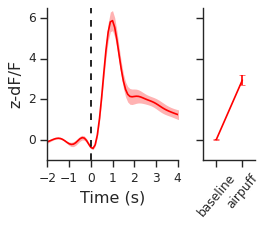

In [106]:
apt.plotMeans('LHA-LHb','airpuff','onset',
              plot_type='mean and SEM',
              color='red',periods=['baseline','airpuff'],
              xlim=[-2,4],ylim=[-1,6.5],yticks=[0,2,4,6])
plt.show()

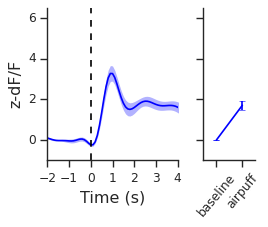

In [107]:
apt.plotMeans('LHA-VTA','airpuff','onset',
              plot_type='mean and SEM',
              color='blue',periods=['baseline','airpuff'],
              xlim=[-2,4],ylim=[-1,6.5],yticks=[0,2,4,6])
plt.show()

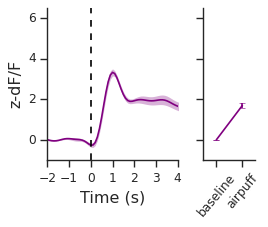

In [108]:
apt.plotMeans('LHA-DRN','airpuff','onset',
              plot_type='mean and SEM',
              color='purple', periods=['baseline','airpuff'],
              xlim=[-2,4],ylim=[-1,6.5],yticks=[0,2,4,6])
plt.show()

### APT w/movement

In [109]:
apt = FiberPhotometryTest(filename,'APTmovement')

Experiment information for test APTmovement is successfully loaded.


In [110]:
apt.getMeans(auc_frames={'airpuff-onset': [[-2,-1],[0,1.5],[3,4]]})

LHA75,1 LHA76,1 LHA77,1 LHA77,2 LHA78,1 LHA78,2 LHA80,1 LHA80,2 LHA81,1 LHA81,2 LHA82,1 LHA82,2 LHA83,1 LHA83,2 LHA84,1 LHA84,2 LHA86,1 LHA86,2 .
Saved dF/F mean traces for LHA-DRN airpuff-onset
LHA73,1 LHA74,1 LHA74,2 LHA76,1 LHA77,1 LHA78,1 LHA78,2 LHA79,1 LHA80,2 LHA81,1 LHA82,1 LHA82,2 LHA83,1 LHA84,1 LHA84,2 LHA86,1 LHA86,2 .
Saved dF/F mean traces for LHA-LHb airpuff-onset
LHA74,1 LHA74,2 LHA76,1 LHA77,1 LHA78,1 LHA78,2 LHA79,1 LHA79,2 LHA80,2 LHA81,1 LHA82,1 LHA83,1 LHA84,1 LHA84,2 LHA86,1 LHA86,2 .
Saved dF/F mean traces for LHA-VTA airpuff-onset
LHA73,1 LHA73,2 LHA74,1 LHA74,2 LHA75,1 LHA75,2 LHA76,1 LHA77,1 LHA77,2 LHA78,1 LHA78,2 LHA79,1 LHA79,2 LHA80,1 LHA80,2 LHA81,1 LHA81,2 LHA82,1 LHA82,2 LHA83,1 LHA83,2 LHA84,1 LHA84,2 LHA86,1 LHA86,2 .
Saved dF/F mean traces for movement airpuff-onset.


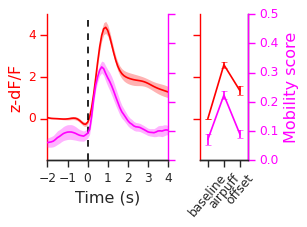

In [141]:
apt.plotMeans('LHA-LHb','airpuff','onset',measure='movement',
              plot_type='mean and SEM',
              color='red',periods=['baseline','airpuff','offset'],
              xlim=[-2,4],ylim=[-2,5],yticks=[0,2,4],
              ylim1=[0,0.5],
              figsize=(4,3),save=True,imgname='plots/LH-LHb_APT_movement.pdf')
plt.show()

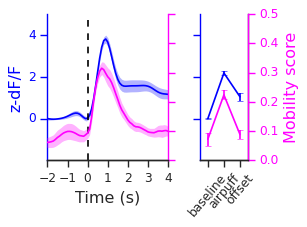

In [142]:
apt.plotMeans('LHA-VTA','airpuff','onset',measure='movement',
              plot_type='mean and SEM',
              color='blue',periods=['baseline','airpuff','offset'],
              xlim=[-2,4],ylim=[-2,5],yticks=[0,2,4],
              ylim1=[0,0.5],
              figsize=(4,3),save=True,imgname='plots/LH-VTA_APT_movement.pdf')
plt.show()

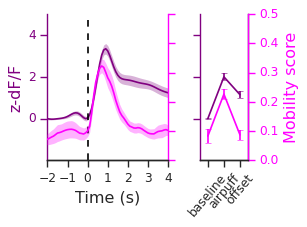

In [143]:
apt.plotMeans('LHA-DRN','airpuff','onset',measure='movement',
              plot_type='mean and SEM',
              color='purple', periods=['baseline','airpuff','offset'],
              xlim=[-2,4],ylim=[-2,5],yticks=[0,2,4],
              ylim1=[0,0.5],
              figsize=(4,3),save=True,imgname='plots/LH-DRN_airpuff_movement.pdf')
plt.show()

### SCT

In [114]:
sct = FiberPhotometryTest(filename,'SCT')

Experiment information for test SCT is successfully loaded.


In [115]:
sct.getMeans(auc_frames={'consumption-onset': [[-2,-1],[-0.5,1],[2,4]],
                        'consumption-offset': [[-3,-1],[1,3]]})

LHA1,1 LHA1,3 LHA1,4 LHA10,1 LHA10,2 LHA10,3 LHA11,1 LHA12,3 LHA14,1 LHA15,1 LHA16,1 LHA17,1 LHA2,1 LHA2,3 LHA3,2 LHA3,3 LHA4,1 LHA4,2 LHA4,3 LHA4,4 LHA5,1 LHA6,2 LHA6,4 LHA9,1 LHA9,2 .
Saved dF/F mean traces for LHA-DRN consumption-offset
LHA1,1 LHA1,3 LHA1,4 LHA10,1 LHA10,2 LHA10,3 LHA11,1 LHA12,3 LHA14,1 LHA15,1 LHA16,1 LHA17,1 LHA2,1 LHA2,3 LHA3,2 LHA3,3 LHA4,1 LHA4,2 LHA4,3 LHA4,4 LHA5,1 LHA6,2 LHA6,4 LHA9,1 LHA9,2 .
Saved dF/F mean traces for LHA-DRN consumption-onset
LHA1,1 LHA1,3 LHA12,1 LHA12,3 LHA14,1 LHA15,1 LHA16,1 LHA17,1 LHA2,1 LHA2,3 LHA3,1 LHA4,1 LHA4,3 LHA5,1 LHA6,1 LHA9,1 .
Saved dF/F mean traces for LHA-LHb consumption-offset
LHA1,1 LHA1,3 LHA12,1 LHA12,3 LHA14,1 LHA15,1 LHA16,1 LHA17,1 LHA2,1 LHA2,3 LHA3,1 LHA4,1 LHA4,3 LHA5,1 LHA6,1 LHA9,1 .
Saved dF/F mean traces for LHA-LHb consumption-onset
LHA1,4 LHA10,2 LHA10,3 LHA14,1 LHA15,1 LHA16,1 LHA17,1 LHA2,2 LHA3,2 LHA3,3 LHA4,2 LHA4,4 LHA5,2 LHA6,2 LHA6,4 LHA9,2 LHA9,3 .
Saved dF/F mean traces for LHA-VTA consumption-

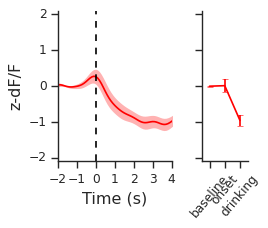

In [116]:
sct.plotMeans('LHA-LHb','consumption','onset',
              plot_type='mean and SEM',
              color='red',periods=['baseline','onset','drinking'],
              xlim=[-2,4],ylim=[-2.1,2.1])
plt.show()

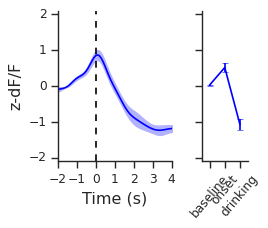

In [117]:
sct.plotMeans('LHA-VTA','consumption','onset',
              plot_type='mean and SEM',
              color='blue',periods=['baseline','onset','drinking'],
              xlim=[-2,4],ylim=[-2.1,2.1])
plt.show()

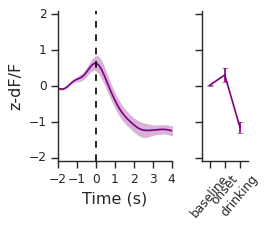

In [118]:
sct.plotMeans('LHA-DRN','consumption','onset',
              plot_type='mean and SEM',
              color='purple',periods=['baseline','onset','drinking'],
              xlim=[-2,4],ylim=[-2.1,2.1])
plt.show()

### SCT w/movement

In [129]:
sct = FiberPhotometryTest(filename,'SCTmovement')

Experiment information for test SCTmovement is successfully loaded.


In [130]:
sct.getMeans(auc_frames={'consumption-onset': [[-2,-1],[-0.5,1],[2,4]],
                        'consumption-offset': [[-3,-1],[1,3]]})

LHA1,3 LHA1,4 LHA10,3 LHA12,3 LHA2,3 LHA4,3 LHA4,4 LHA6,4 .
Saved dF/F mean traces for LHA-DRN consumption-offset
LHA1,3 LHA1,4 LHA10,3 LHA12,3 LHA2,3 LHA4,3 LHA4,4 LHA6,4 .
Saved dF/F mean traces for LHA-DRN consumption-onset
LHA1,3 LHA12,3 LHA2,3 LHA4,3 .
Saved dF/F mean traces for LHA-LHb consumption-offset
LHA1,3 LHA12,3 LHA2,3 LHA4,3 .
Saved dF/F mean traces for LHA-LHb consumption-onset
LHA1,4 LHA10,3 LHA3,3 LHA4,4 LHA6,4 LHA9,3 .
Saved dF/F mean traces for LHA-VTA consumption-offset
LHA1,4 LHA10,3 LHA3,3 LHA4,4 LHA6,4 LHA9,3 .
Saved dF/F mean traces for LHA-VTA consumption-onset
LHA1,3 LHA1,4 LHA10,3 LHA12,3 LHA2,3 LHA3,3 LHA4,3 LHA4,4 LHA6,3 LHA6,4 LHA9,3 .
Saved dF/F mean traces for movement consumption-offset.
LHA1,3 LHA1,4 LHA10,3 LHA12,3 LHA2,3 LHA3,3 LHA4,3 LHA4,4 LHA6,3 LHA6,4 LHA9,3 .
Saved dF/F mean traces for movement consumption-onset.


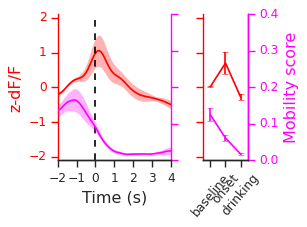

In [144]:
sct.plotMeans('LHA-LHb','consumption','onset',measure='movement',
              plot_type='mean and SEM',
              color='red',periods=['baseline','onset','drinking'],
              ylim=[-2.1,2.1],xlim=[-2,4],
              ylim1=[0,0.4],yticks1=[0,0.1,0.2,0.3,0.4],
              figsize=(4,3),save=True,imgname='plots/LH-LHb_SCTonset_movement.pdf')
plt.show()

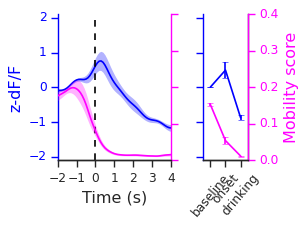

In [145]:
sct.plotMeans('LHA-VTA','consumption','onset',measure='movement',
              plot_type='mean and SEM',
              color='blue',periods=['baseline','onset','drinking'],
              ylim=[-2.1,2.1],xlim=[-2,4],
              ylim1=[0,0.4],yticks1=[0,0.1,0.2,0.3,0.4],
              figsize=(4,3),save=True,imgname='plots/LH-VTA_SCTonset_movement.pdf')
plt.show()

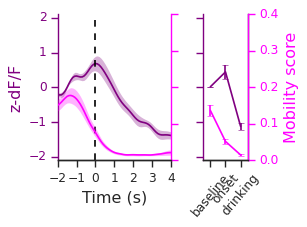

In [146]:
sct.plotMeans('LHA-DRN','consumption','onset',measure='movement',
              plot_type='mean and SEM',
              color='purple',periods=['baseline','onset','drinking'],
              ylim=[-2.1,2.1],xlim=[-2,4],
              ylim1=[0,0.4],yticks1=[0,0.1,0.2,0.3,0.4],
              figsize=(4,3),save=True,imgname='plots/LH-DRN_SCTonset_movement.pdf')
plt.show()

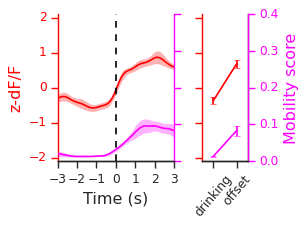

In [147]:
sct.plotMeans('LHA-LHb','consumption','offset',measure='movement',
              plot_type='mean and SEM',
              color='red',periods=['drinking','offset'],
              ylim=[-2.1,2.1],xlim=[-3,3], 
              ylim1=[0,0.4],yticks1=[0,0.1,0.2,0.3,0.4],
              figsize=(4,3),save=True,imgname='plots/LH-LHb_SCToffset_movement.pdf')
plt.show()

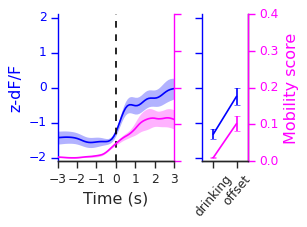

In [148]:
sct.plotMeans('LHA-VTA','consumption','offset',measure='movement',
              plot_type='mean and SEM',
              color='blue',periods=['drinking','offset'],
              ylim=[-2.1,2.1],xlim=[-3,3],
              ylim1=[0,0.4],yticks1=[0,0.1,0.2,0.3,0.4],
              figsize=(4,3),save=True,imgname='plots/LH-VTA_SCToffset_movement.pdf')
plt.show()

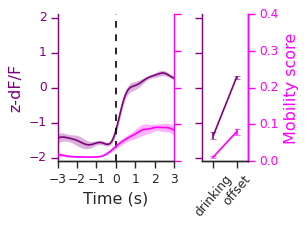

In [149]:
sct.plotMeans('LHA-DRN','consumption','offset',measure='movement',
              plot_type='mean and SEM',
              color='purple',periods=['drinking','offset'],
              ylim=[-2.1,2.1],xlim=[-3,3],
              ylim1=[0,0.4],yticks1=[0,0.1,0.2,0.3,0.4],
              figsize=(4,3),save=True,imgname='plots/LH-DRN_SCToffset_movement.pdf')
plt.show()

# Save summary data to excel file for statistical analysis

In [7]:
apt = FiberPhotometryTest('LH_apt-sct.h5','APT')
sct = FiberPhotometryTest('LH_apt-sct.h5','SCT')
aptM = FiberPhotometryTest('LH_apt-sct.h5','APTmovement')
sctM = FiberPhotometryTest('LH_apt-sct.h5','SCTmovement')
oft = FiberPhotometryTest('LH_oft-tst.h5','OFT')
tst = FiberPhotometryTest('LH_oft-tst.h5','TST')

Experiment information for test APT is successfully loaded.
Experiment information for test SCT is successfully loaded.
Experiment information for test APTmovement is successfully loaded.
Experiment information for test SCTmovement is successfully loaded.
Experiment information for test OFT is successfully loaded.
Experiment information for test TST is successfully loaded.


In [12]:
df_apt = apt.getDataFrameAUC('airpuff','onset',['baseline','airpuff'])
df_sct = sct.getDataFrameAUC('consumption','onset',['baseline','onset','drinking'])
df_oft = oft.getDataFrameAUC('immobility','offset',['immobile','preonset','onset','mobile'])
df_tst = tst.getDataFrameAUC('immobility','offset',['immobile','preonset','onset','mobile'])
df_oft_mob = oft.getDataFrameAUCmeasure('immobility','offset',['immobile','preonset','onset','mobile'])
df_tst_mob = tst.getDataFrameAUCmeasure('immobility','offset',['immobile','preonset','onset','mobile'])

# SuppFig
df_aptM = aptM.getDataFrameAUC('airpuff','onset',['baseline','airpuff','offset'])
df_aptM_mob = aptM.getDataFrameAUCmeasure('airpuff','onset',['baseline','airpuff','offset'])

df_sctM_on = sctM.getDataFrameAUC('consumption','onset',['baseline','onset','drinking'])
df_sctM_off = sctM.getDataFrameAUC('consumption','offset',['drinking','offset'])
df_sctM_on_mob = sctM.getDataFrameAUCmeasure('consumption','onset',['baseline','onset','drinking'])
df_sctM_off_mob = sctM.getDataFrameAUCmeasure('consumption','offset',['drinking','offset'])

df_oft_off = oft.getDataFrameAUC('immobility','onset',['mobile','immobile'])
df_tst_off = tst.getDataFrameAUC('immobility','onset',['mobile','immobile'])
df_oft_off_mob = oft.getDataFrameAUCmeasure('immobility','onset',['mobile','immobile'])
df_tst_off_mob = tst.getDataFrameAUCmeasure('immobility','onset',['mobile','immobile'])

In [ ]:
exp = FiberPhotometryExperiment('LH_APT-SCT-OFT-TST.h5')
df_corr = exp.getDataFrameRoutputs(tests=['APT','SCT','OFT','TST'])

In [9]:
!pip install xlsxwriter
import xlsxwriter

     |████████████████████████████████| 149 kB 7.5 MB/s 


In [11]:
writer = pd.ExcelWriter('../full submission 2/sourcedata/fig1_LH_apt-sct-oft-tst.xlsx', engine='xlsxwriter')

df_apt.to_excel(writer,sheet_name='APT', index=False)
df_sct.to_excel(writer,sheet_name='SCT', index=False)
df_oft.to_excel(writer,sheet_name='OFT', index=False)
df_tst.to_excel(writer,sheet_name="TST", index=False)
df_oft_mob.to_excel(writer,sheet_name='OFT_mobileScore', index=False)
df_tst_mob.to_excel(writer,sheet_name="TST_mobileScore", index=False)
#df_corr.to_excel(writer,sheet_name='outputCorrelation', index=False)

#SuppFig
df_aptM.to_excel(writer,sheet_name='APTmove', index=False)
df_aptM_mob.to_excel(writer,sheet_name='APTmove_mobileScore', index=False)

df_sctM_on.to_excel(writer,sheet_name='SCTon', index=False)
df_sctM_off.to_excel(writer,sheet_name='SCToff', index=False)
df_sctM_on_mob.to_excel(writer,sheet_name='SCTon_mobileScore', index=False)
df_sctM_off_mob.to_excel(writer,sheet_name='SCToff_mobileScore', index=False)

df_oft_off.to_excel(writer,sheet_name='OFToff', index=False)
df_tst_off.to_excel(writer,sheet_name="TSToff", index=False)
df_oft_off_mob.to_excel(writer,sheet_name='OFToff_mobileScore', index=False)
df_tst_off_mob.to_excel(writer,sheet_name="TSToff_mobileScore", index=False)

writer.save()

In [ ]:
df_total = exp.getDataFrameRmeasure('movement',['OFT','TST'])
df_peri = exp.getDataFrameMeasureCorrCounts('movement',['OFT','TST'],['LHA-DRN','LHA-VTA','LHA-LHb'])
df_oft = oft.getDataFrameCrossCorr('movement','immobility','offset')
df_tst = tst.getDataFrameCrossCorr('movement','immobility','offset')
df_oft['test'] = 'OFT'
df_tst['test'] = 'TST'
df_crossCorr = pd.concat([df_tst,df_oft])

In [ ]:
writer = pd.ExcelWriter('../sourcedata/fig2_LH_movementCorrelation.xlsx', engine='xlsxwriter')
df_total.to_excel(writer,sheet_name='total',index=False)
df_peri.to_excel(writer,sheet_name='perievent',index=False)
df_crossCorr.to_excel(writer,sheet_name='crossCorrelation',index=False)
writer.save()